# PSD analysis and conversation for LME in R
This file converts oscillatory data into a transferrable CSV format. We also visualize the oscillatory observations here.

## Load in the necessary packages and prepare the signals.
As with the ERP analysis, we will create epochs for analysis. Unlike the previous example, we will not analyze 1 second epochs, but the 10 second epochs pre and post the Button_Signal condition. 

In [1]:
import numpy as np
import matplotlib
import mne
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
from scipy import stats
import numpy as np
import pandas as pd

mne.set_log_level('error')

data_path = '.'

subjects = [
    '01',
    '02',
    '03',
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10', 
    '11',
    #participant 12 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '13',
    '14', 
    '15',
    '16',
    '17',
    '18',
    '19',
    '20',
    '21',
    # participant 22 has a bug which is throwing my program
    '23',
    '24', 
    '25', 
    '26', 
    '27',
    '28',
    '29',
    '30',
    '31',
    '32',
    '33',
    '34',
    '35', 
    #participant 36 excluded from all analysis due to an unfixable technical error - amplifier recording error f 
    '37',
    '38',
    '39', 
    '40',
    '41', 
    '42',
    '43', 
    '44', 
    '45',
    #participant 46 excluded from all analysis due to an unfixable technical error - too many head movements f
    #participant 47 excluded from all analysis because of a technical error with mastoids m
    '48',
    '49',
    '50',
    '51',
    '52',
]

n_subjects = len(subjects)

all_epochs = []

for subject in subjects:
    epochs = mne.read_epochs(data_path + '/' + subject + '/eeg_recordings/' + 'aalis-' + subject + '-epo.fif')
    all_epochs.append(epochs) #[epochs]
    print("...processed " + str(subject))

#print means

...processed 01
...processed 02
...processed 03
...processed 04
...processed 05
...processed 06
...processed 07
...processed 08
...processed 09
...processed 10
...processed 11
...processed 13
...processed 14
...processed 15
...processed 16
...processed 17
...processed 18
...processed 19
...processed 20
...processed 21
...processed 23
...processed 24
...processed 25
...processed 26
...processed 27
...processed 28
...processed 29
...processed 30
...processed 31
...processed 32
...processed 33
...processed 34
...processed 35
...processed 37
...processed 38
...processed 39
...processed 40
...processed 41
...processed 42
...processed 43
...processed 44
...processed 45
...processed 48
...processed 49
...processed 50
...processed 51
...processed 52


## Compare frequency band power at the group level

In [2]:
# a function for retrieving the psds using welch

def get_psds(epochs, region, fmin, fmax):
    psds, freqs = psd_welch(epochs, tmin=tmin, tmax=tmax, fmin=fmin, fmax=fmax, picks=region, n_jobs=1, average='mean')
    psds = 10 * np.log10(psds) # returns shape epochs, n_channels, n_freq; use this to convert to decibels    
    avgs = psds.T.mean(0) # returns mean for each epoch, channel
    return(avgs)

# regions of interest

occipital_names = ['POz', 'Oz', 'O1', 'O2']

occipital = [all_epochs[0][0].ch_names.index('POz'), 
        all_epochs[0][0].ch_names.index('Oz'), 
        all_epochs[0][0].ch_names.index('O1'),
        all_epochs[0][0].ch_names.index('O2'),
        ]

parietal_names = ['Pz', 'P3', 'P4', 'CPz', 'CP4']

parietal = [all_epochs[0][0].ch_names.index('Pz'),
        all_epochs[0][0].ch_names.index('CPz'), 
        all_epochs[0][0].ch_names.index('CP3'),
        all_epochs[0][0].ch_names.index('CP4'),
        ]

frontal_names = ['Fz', 'Fp1', 'Fp2', 'F3', 'F4']

frontal = [all_epochs[0][0].ch_names.index('Fz'), 
         all_epochs[0][0].ch_names.index('Fp1'), 
         all_epochs[0][0].ch_names.index('Fp2'),
         all_epochs[0][0].ch_names.index('F3'),
         all_epochs[0][0].ch_names.index('F4'),
         ]

# other variables of interest

tmin = 0
tmax = 1

# Visualize PSD differences by conditions
PSDs must be calculated from collections of epochs, not evokeds, for whatever reason. We retrieve the epochs for each condition, concatenate, and then compare visually.

In [3]:
mw1s = []
mw1o = []
mw3s = []
mw3o = []
mw5s = []
mw5o = []

for e in all_epochs:
    if 'MW1/Standard' in e.event_id.keys():
        mw1s.append(e['MW1/Standard'])
    if 'MW1/Oddball' in e.event_id.keys():
        mw1o.append(e['MW1/Oddball'])
    if 'MW3/Standard' in e.event_id.keys():
        mw3s.append(e['MW3/Standard'])
    if 'MW3/Oddball' in e.event_id.keys():
        mw3o.append(e['MW3/Oddball'])
    if 'MW5/Standard' in e.event_id.keys():
        mw5s.append(e['MW5/Standard'])
    if 'MW5/Oddball' in e.event_id.keys():
        mw5o.append(e['MW5/Oddball'])

In [4]:
import matplotlib.pyplot as plt

mw1s = mne.concatenate_epochs(mw1s)
mw1o = mne.concatenate_epochs(mw1o)
mw3s = mne.concatenate_epochs(mw3s)
mw3o = mne.concatenate_epochs(mw3o)
mw5s = mne.concatenate_epochs(mw5s)
mw5o = mne.concatenate_epochs(mw5o)

## PSD topomaps
These are extremely limited. I tinkered with them for days to try to get the difference plots. No luck.

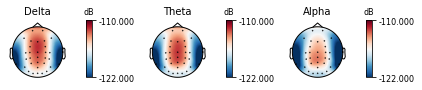

In [7]:
bands = [(2, 4, 'Delta'), (4, 7, 'Theta'), (8, 12, 'Alpha')]

topo = mw1s.plot_psd_topomap(bands = bands, normalize = False, vmin = -122, vmax = -110, normalization='full');

topo.savefig('power_topo_mw1s.png', dpi=300)

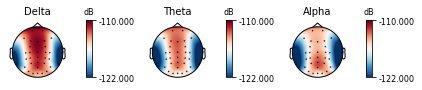

In [8]:
topo = mw5s.plot_psd_topomap(bands = bands, normalize = False, vmin = -122, vmax = -110, normalization='full');

topo.savefig('power_topo_mw5s.png', dpi=300)

## Plot frontal differences

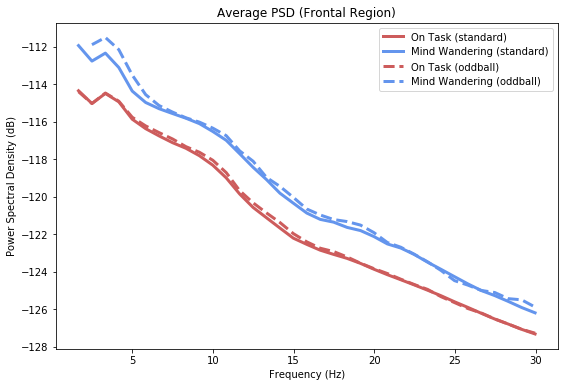

In [9]:
region = frontal

f, ax = plt.subplots(figsize=(9,6))

psds1, freqs1 = psd_multitaper(mw1s, fmin=1, fmax=30, n_jobs=1, picks=region, low_bias=True, normalization='full') # enter comparison 1 here
psds1 = 10 * np.log10(psds1)
psds1_mean = psds1.mean(0).mean(0)
psds1_std = psds1.mean(0).std(0)

ax.plot(freqs1, psds1_mean, color='indianred', label='On Task (standard)', linewidth=3)
ax.legend()

'''psds5, freqs5 = psd_multitaper(mw3s, fmin=1, fmax=30, n_jobs=1, picks=region, low_bias=True, normalization='full') # enter comparison 1 here
psds5 = 10 * np.log10(psds5)
psds5_mean = psds5.mean(0).mean(0)
psds5_std = psds5.mean(0).std(0)

ax.plot(freqs5, psds5_mean, color='orange', label='Neither on task nor mind wandering (standard)', linewidth=3)
ax.legend()'''

psds2, freqs2 = psd_multitaper(mw5s, fmin=1, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 2 here
psds2 = 10 * np.log10(psds2)
psds2_mean = psds2.mean(0).mean(0)
psds2_std = psds2.mean(0).std(0)

ax.plot(freqs2, psds2_mean, color='cornflowerblue', label='Mind Wandering (standard)', linewidth=3)
ax.legend()

psds3, freqs3 = psd_multitaper(mw1o, fmin=1, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 1 here
psds3 = 10. * np.log10(psds3)
psds3_mean = psds3.mean(0).mean(0)
psds3_std = psds3.mean(0).std(0)

ax.plot(freqs3, psds3_mean, color='indianred', label='On Task (oddball)', linewidth=3, linestyle='--')
ax.legend()

'''psds6, freqs6 = psd_multitaper(mw3o, fmin=1, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 2 here
psds6 = 10 * np.log10(psds6)
psds6_mean = psds6.mean(0).mean(0)
psds6_std = psds6.mean(0).std(0)

ax.plot(freqs6, psds6_mean, color='orange', label='Neither on task nor mind wandering (oddball)', linewidth=3, linestyle='--')
ax.legend()'''

psds4, freqs4 = psd_multitaper(mw5o, fmin=2, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 2 here
psds4 = 10. * np.log10(psds4)
psds4_mean = psds4.mean(0).mean(0)
psds4_std = psds4.mean(0).std(0)

ax.plot(freqs4, psds4_mean, color='cornflowerblue', label='Mind Wandering (oddball)', linewidth=3, linestyle='--')
ax.legend()

ax.set(title='Average PSD (Frontal Region)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')

plt.savefig('power_frontal.png', dpi=300)
plt.show()

## Plot occipital differences

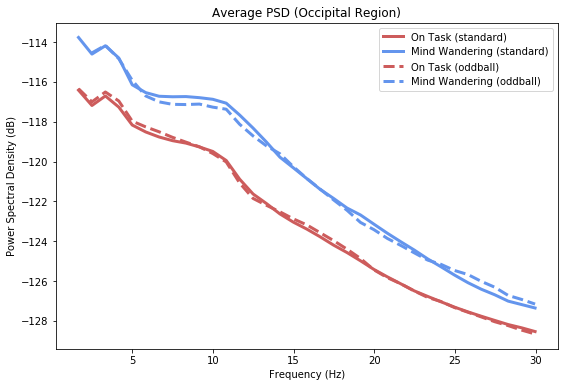

In [10]:
region = occipital

f, ax = plt.subplots(figsize=(9,6))

psds1, freqs1 = psd_multitaper(mw1s, fmin=1, fmax=30, n_jobs=1, picks=region, low_bias=True, normalization='full') # enter comparison 1 here
psds1 = 10 * np.log10(psds1)
psds1_mean = psds1.mean(0).mean(0)
psds1_std = psds1.mean(0).std(0)

ax.plot(freqs1, psds1_mean, color='indianred', label='On Task (standard)', linewidth=3)
ax.legend()

psds2, freqs2 = psd_multitaper(mw5s, fmin=1, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 2 here
psds2 = 10 * np.log10(psds2)
psds2_mean = psds2.mean(0).mean(0)
psds2_std = psds2.mean(0).std(0)

ax.plot(freqs2, psds2_mean, color='cornflowerblue', label='Mind Wandering (standard)', linewidth=3)
ax.legend()

psds3, freqs3 = psd_multitaper(mw1o, fmin=1, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 1 here
psds3 = 10. * np.log10(psds3)
psds3_mean = psds3.mean(0).mean(0)
psds3_std = psds3.mean(0).std(0)

ax.plot(freqs3, psds3_mean, color='indianred', label='On Task (oddball)', linewidth=3, linestyle='--')
ax.legend()

psds4, freqs4 = psd_multitaper(mw5o, fmin=2, fmax=30, picks=region, low_bias=True, normalization='full') # enter comparison 2 here
psds4 = 10. * np.log10(psds4)
psds4_mean = psds4.mean(0).mean(0)
psds4_std = psds4.mean(0).std(0)

ax.plot(freqs4, psds4_mean, color='cornflowerblue', label='Mind Wandering (oddball)', linewidth=3, linestyle='--')
ax.legend()

ax.set(title='Average PSD (Occipital Region)', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')

plt.savefig('power_occipital.png', dpi=300)
plt.show()

# Loop to create PSD CSV files

## Loop through to create dataframe for alpha

In [11]:
psds = []
i = 1

for e in all_epochs:
    for cond in ['MW1/Standard','MW1/Oddball','MW2/Standard','MW2/Oddball''MW3/Standard','MW3/Oddball','MW4/Standard','MW4/Oddball','MW5/Standard','MW5/Oddball']:
        if cond in e.event_id.keys():
            if 'Standard' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', occipital_names[j], cond[:3], 'occipital', 'alpha'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', parietal_names[j], cond[:3], 'parietal', 'alpha'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', frontal_names[j], cond[:3], 'frontal', 'alpha'])
                    j += 1

            
            elif 'Oddball' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', occipital_names[j], cond[:3], 'occipital', 'alpha'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', parietal_names[j], cond[:3], 'parietal', 'alpha'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=8, fmax=12)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', frontal_names[j], cond[:3], 'frontal', 'alpha'])
                    j += 1
    i += 1
                    
df = pd.DataFrame.from_records(psds, columns=['Subj', 'PSD', 'Stim', 'Channel', 'Condition', 'Region', 'Band'])

# create random effects

df['Electrode_by_Subj'] = df['Channel'] + "_" + df['Subj'] # electrode by subj
df['Stim_by_Subj'] = df['Stim'] + "_" + df['Subj'] # stimtype by subj
df['Cond_by_Subj'] = df['Condition'] + "_" + df['Subj'] # mental state by subj

# write to csv
df.to_csv('osc_data/alpha.csv')

## Loop through to create dataframe for beta

In [12]:
psds = []
i = 1

for e in all_epochs:
    for cond in ['MW1/Standard','MW1/Oddball','MW2/Standard','MW2/Oddball''MW3/Standard','MW3/Oddball','MW4/Standard','MW4/Oddball','MW5/Standard','MW5/Oddball']:
        if cond in e.event_id.keys():
            if 'Standard' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', occipital_names[j], cond[:3], 'occipital', 'beta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', parietal_names[j], cond[:3], 'parietal', 'beta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', frontal_names[j], cond[:3], 'frontal', 'beta'])
                    j += 1

            
            elif 'Oddball' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', occipital_names[j], cond[:3], 'occipital', 'beta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', parietal_names[j], cond[:3], 'parietal', 'beta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=13, fmax=30)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', frontal_names[j], cond[:3], 'frontal', 'beta'])
                    j += 1
    i += 1
                    
df = pd.DataFrame.from_records(psds, columns=['Subj', 'PSD', 'Stim', 'Channel', 'Condition', 'Region', 'Band']) # create DF

# create random effects

df['Electrode_by_Subj'] = df['Channel'] + "_" + df['Subj'] # electrode by subj
df['Stim_by_Subj'] = df['Stim'] + "_" + df['Subj'] # stimtype by subj
df['Cond_by_Subj'] = df['Condition'] + "_" + df['Subj'] # mental state by subj

# write to csv
df.to_csv('osc_data/beta.csv')

## Loop through to create dataframe for delta

In [13]:
psds = []
i = 1

for e in all_epochs:
    for cond in ['MW1/Standard','MW1/Oddball','MW2/Standard','MW2/Oddball''MW3/Standard','MW3/Oddball','MW4/Standard','MW4/Oddball','MW5/Standard','MW5/Oddball']:
        if cond in e.event_id.keys():
            if 'Standard' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', occipital_names[j], cond[:3], 'occipital', 'delta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', parietal_names[j], cond[:3], 'parietal', 'delta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', frontal_names[j], cond[:3], 'frontal', 'delta'])
                    j += 1

            
            elif 'Oddball' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', occipital_names[j], cond[:3], 'occipital', 'delta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', parietal_names[j], cond[:3], 'parietal', 'delta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=2, fmax=4)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', frontal_names[j], cond[:3], 'frontal', 'delta'])
                    j += 1
    i += 1
                    
df = pd.DataFrame.from_records(psds, columns=['Subj', 'PSD', 'Stim', 'Channel', 'Condition', 'Region', 'Band'])

# create random effects

df['Electrode_by_Subj'] = df['Channel'] + "_" + df['Subj'] # electrode by subj
df['Stim_by_Subj'] = df['Stim'] + "_" + df['Subj'] # stimtype by subj
df['Cond_by_Subj'] = df['Condition'] + "_" + df['Subj'] # mental state by subj

# write to csv
df.to_csv('osc_data/delta.csv')

## Loop through to create dataframe for theta

In [14]:
psds = []
i = 1

for e in all_epochs:
    for cond in ['MW1/Standard','MW1/Oddball','MW2/Standard','MW2/Oddball''MW3/Standard','MW3/Oddball','MW4/Standard','MW4/Oddball','MW5/Standard','MW5/Oddball']:
        if cond in e.event_id.keys():
            if 'Standard' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', occipital_names[j], cond[:3], 'occipital', 'theta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', parietal_names[j], cond[:3], 'parietal', 'theta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'standard', frontal_names[j], cond[:3], 'frontal', 'theta'])
                    j += 1

            
            elif 'Oddball' in cond:
                psd = get_psds(e[cond], region=occipital, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', occipital_names[j], cond[:3], 'occipital', 'theta'])
                    j += 1
                    
                psd = get_psds(e[cond], region=parietal, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', parietal_names[j], cond[:3], 'parietal', 'theta'])
                    j += 1
                psd = get_psds(e[cond], region=frontal, fmin=4, fmax=7)
                j = 0
                for ch in psd:
                    for p in ch:
                        psds.append([str(i), p, 'oddball', frontal_names[j], cond[:3], 'frontal', 'theta'])
                    j += 1
    i += 1
                    
df = pd.DataFrame.from_records(psds, columns=['Subj', 'PSD', 'Stim', 'Channel', 'Condition', 'Region', 'Band'])

# create random effects

df['Electrode_by_Subj'] = df['Channel'] + "_" + df['Subj'] # electrode by subj
df['Stim_by_Subj'] = df['Stim'] + "_" + df['Subj'] # stimtype by subj
df['Cond_by_Subj'] = df['Condition'] + "_" + df['Subj'] # mental state by subj

# write to csv
df.to_csv('osc_data/theta.csv')